# Car Image Classification

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the Libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPool2D
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Loading the data
TrainingImagePath = '/content/drive/MyDrive/cars/train'
TestingImagePath = '/content/drive/MyDrive/cars/test'

In [ ]:
# Image Augmentation
train_datagen = ImageDataGenerator(shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='sparse')

testing_set = test_datagen.flow_from_directory(TestingImagePath,
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='sparse')

testing_set.class_indices

Found 3969 images belonging to 10 classes.
Found 1041 images belonging to 10 classes.


{'Audi': 0,
 'Honda ': 1,
 'Hyundai Creta': 2,
 'Mahindra Scorpio': 3,
 'Rolls Royce': 4,
 'Swift': 5,
 'Tata Safari': 6,
 'Toyota Innova': 7,
 'lamborghini': 8,
 'mercedes': 9}

In [ ]:
# list of the cars
class_names = list(training_set.class_indices.keys())
class_names

['Audi',
 'Honda ',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova',
 'lamborghini',
 'mercedes']

In [ ]:
# class_indices have the numeric tag for each car
TrainClasses=training_set.class_indices
print(TrainClasses)

# the number of neurons for the output layer is equal to the number of cars
OutputNeurons=len(class_names)
print('\n The Number of output neurons:', OutputNeurons)

{'Audi': 0, 'Honda ': 1, 'Hyundai Creta': 2, 'Mahindra Scorpio': 3, 'Rolls Royce': 4, 'Swift': 5, 'Tata Safari': 6, 'Toyota Innova': 7, 'lamborghini': 8, 'mercedes': 9}

 The Number of output neurons: 10


In [ ]:
print(TrainClasses.keys())

dict_keys(['Audi', 'Honda ', 'Hyundai Creta', 'Mahindra Scorpio', 'Rolls Royce', 'Swift', 'Tata Safari', 'Toyota Innova', 'lamborghini', 'mercedes'])


In [ ]:
# Building the CNN Model

model = Sequential()

model.add(Conv2D(32, (3,3), activation="selu", input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation="selu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation="selu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='selu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(OutputNeurons, activation='softmax'))

# Compiling the Model
model.compile(optimizer = Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       2

In [ ]:
# Fitting the model
history = model.fit(training_set, batch_size=32,
                    epochs=25,
                    validation_data=testing_set,
                    
                    callbacks = [EarlyStopping(patience=20, monitor='val_loss', mode='min'), 
                                 ReduceLROnPlateau(patience=2, verbose=1)],verbose=1)



Epoch 1/25
125/125 [==============================] - 945s 8s/step - loss: 6.8830 - accuracy: 0.3260 - val_loss: 6.7826 - val_accuracy: 0.3084 - lr: 0.0010
Epoch 2/25
125/125 [==============================] - 18s 146ms/step - loss: 4.7744 - accuracy: 0.4271 - val_loss: 4.5695 - val_accuracy: 0.4073 - lr: 0.0010
Epoch 3/25
125/125 [==============================] - 19s 153ms/step - loss: 3.5633 - accuracy: 0.4752 - val_loss: 3.4312 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 4/25
125/125 [==============================] - 21s 169ms/step - loss: 2.9080 - accuracy: 0.5208 - val_loss: 2.8762 - val_accuracy: 0.5245 - lr: 0.0010
Epoch 5/25
125/125 [==============================] - 19s 153ms/step - loss: 2.6500 - accuracy: 0.5286 - val_loss: 2.9929 - val_accuracy: 0.4918 - lr: 0.0010
Epoch 6/25
125/125 [==============================] - 18s 146ms/step - loss: 2.4516 - accuracy: 0.5714 - val_loss: 2.5208 - val_accuracy: 0.5495 - lr: 0.0010
Epoch 7/25
125/125 [==============================] - 

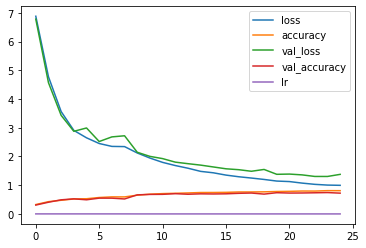

In [ ]:
# Plotting accuracy and loss
import pandas as pd
pd.DataFrame(history.history).plot();

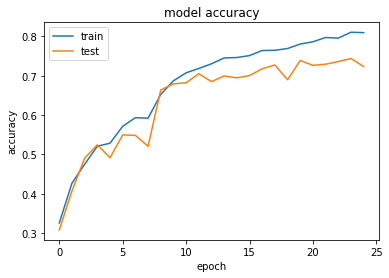

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend (['train', 'test'], loc='upper left')
plt.show()

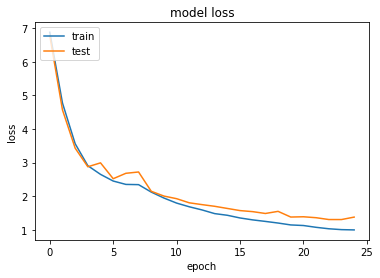

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
score = model.evaluate(testing_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3773298263549805
Test accuracy: 0.7233429551124573


In [ ]:
# Testing the prediction on sample of image from test dataset
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 19ms/step


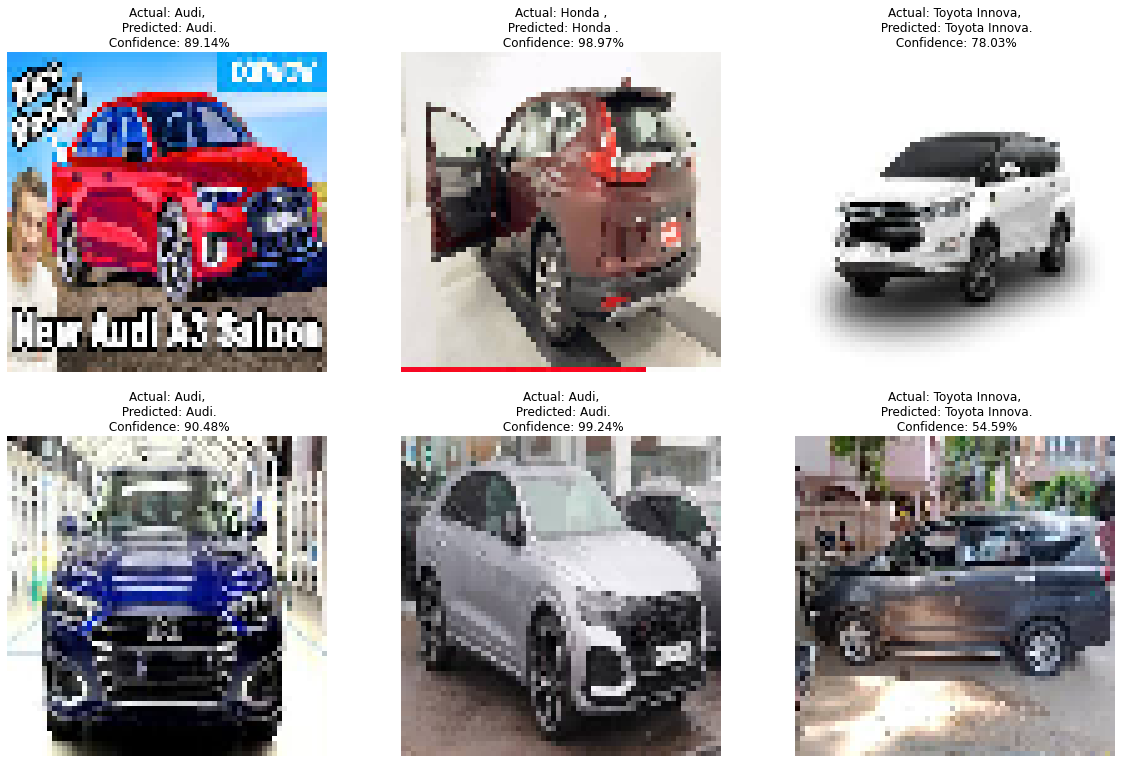

In [ ]:
plt.figure(figsize=(20, 20))
for images, labels in testing_set:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype('uint8'),cmap='gray')
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break
  

In [ ]:
# Saving the model 
#model.save('finalized_model.h5')